In [ ]:
# Mackaelan Songco
# Homework 8 - Curve Fitting & Linear Regression 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [59]:
dataFrame = pd.read_csv("GlobalLandTemperaturesByState.csv")
dataFrame = dataFrame.loc[:, ['dt', 'AverageTemperature', 'State']]
dataFrame = dataFrame.loc[(dataFrame['dt'] >= '2000-01-01')]
dataFrame.loc[(dataFrame['State'] == 'Nebraska') | (dataFrame['State'] == 'South Dakota') | (dataFrame['State'] == 'Wyoming')]

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [664]:
dataFrame = dataFrame.groupby('dt')['AverageTemperature'].mean().reset_index()
dataFrame.columns = ['dt', 'AverageTemperature']
dataFrame

,dt,AverageTemperature
0,2000-01-01,-1.488701
1,2000-02-01,1.636025
2,2000-03-01,5.949112
3,2000-04-01,11.893104
4,2000-05-01,15.598062
...,...,...
160,2013-05-01,16.636224
161,2013-06-01,20.038432
162,2013-07-01,21.292237
163,2013-08-01,20.504776


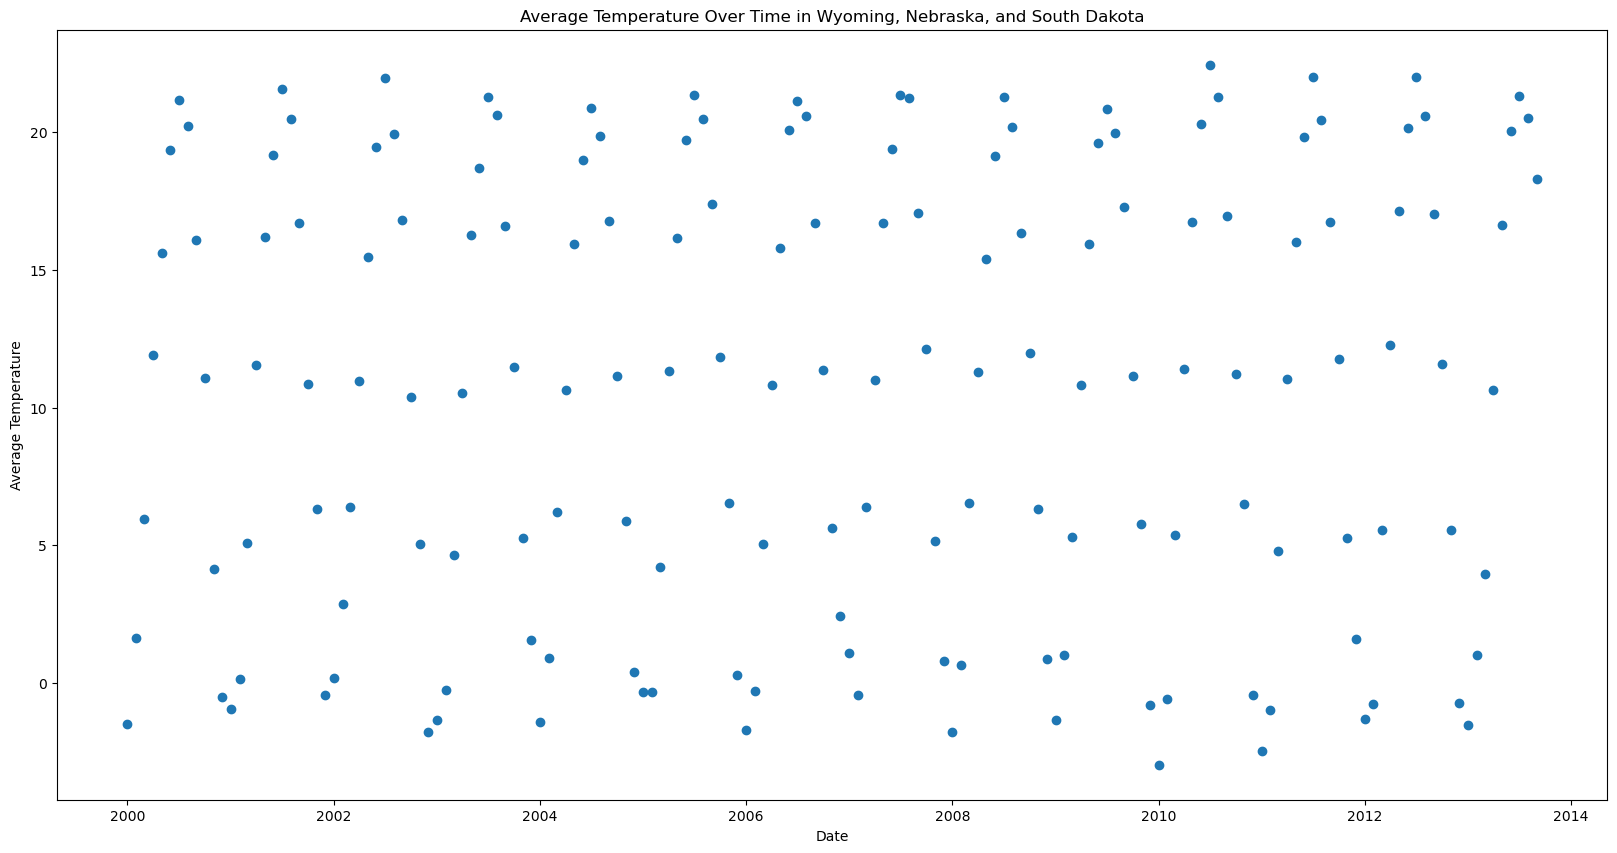

In [665]:
plt.figure(figsize = (20, 10))
plt.scatter(dataFrame['dt'], dataFrame['AverageTemperature'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time in Wyoming, Nebraska, and South Dakota')
plt.show()

In [660]:
dataFrame['dt'] = pd.to_datetime(dataFrame['dt'])
dataFrame['num_date'] = dataFrame['dt'].apply(lambda x: int(x.strftime('%Y%m%d')))
dataFrame

,dt,AverageTemperature,num_date
0,2000-01-01,-1.488701,20000101
1,2000-02-01,1.636025,20000201
2,2000-03-01,5.949112,20000301
3,2000-04-01,11.893104,20000401
4,2000-05-01,15.598062,20000501
...,...,...,...
160,2013-05-01,16.636224,20130501
161,2013-06-01,20.038432,20130601
162,2013-07-01,21.292237,20130701
163,2013-08-01,20.504776,20130801


In [650]:
def model(x, a, b, c, d):
    return (a * np.cos(b * x + c)) + d

initial_guess = [15, 0.05, 1, 10]

In [661]:
x = dataFrame['num_date']
params, params_cov = curve_fit(model, dataFrame['num_date'], dataFrame['AverageTemperature'], p0=initial_guess) 
a, b, c, d = params
yFit = model(x, a, b, c, d)

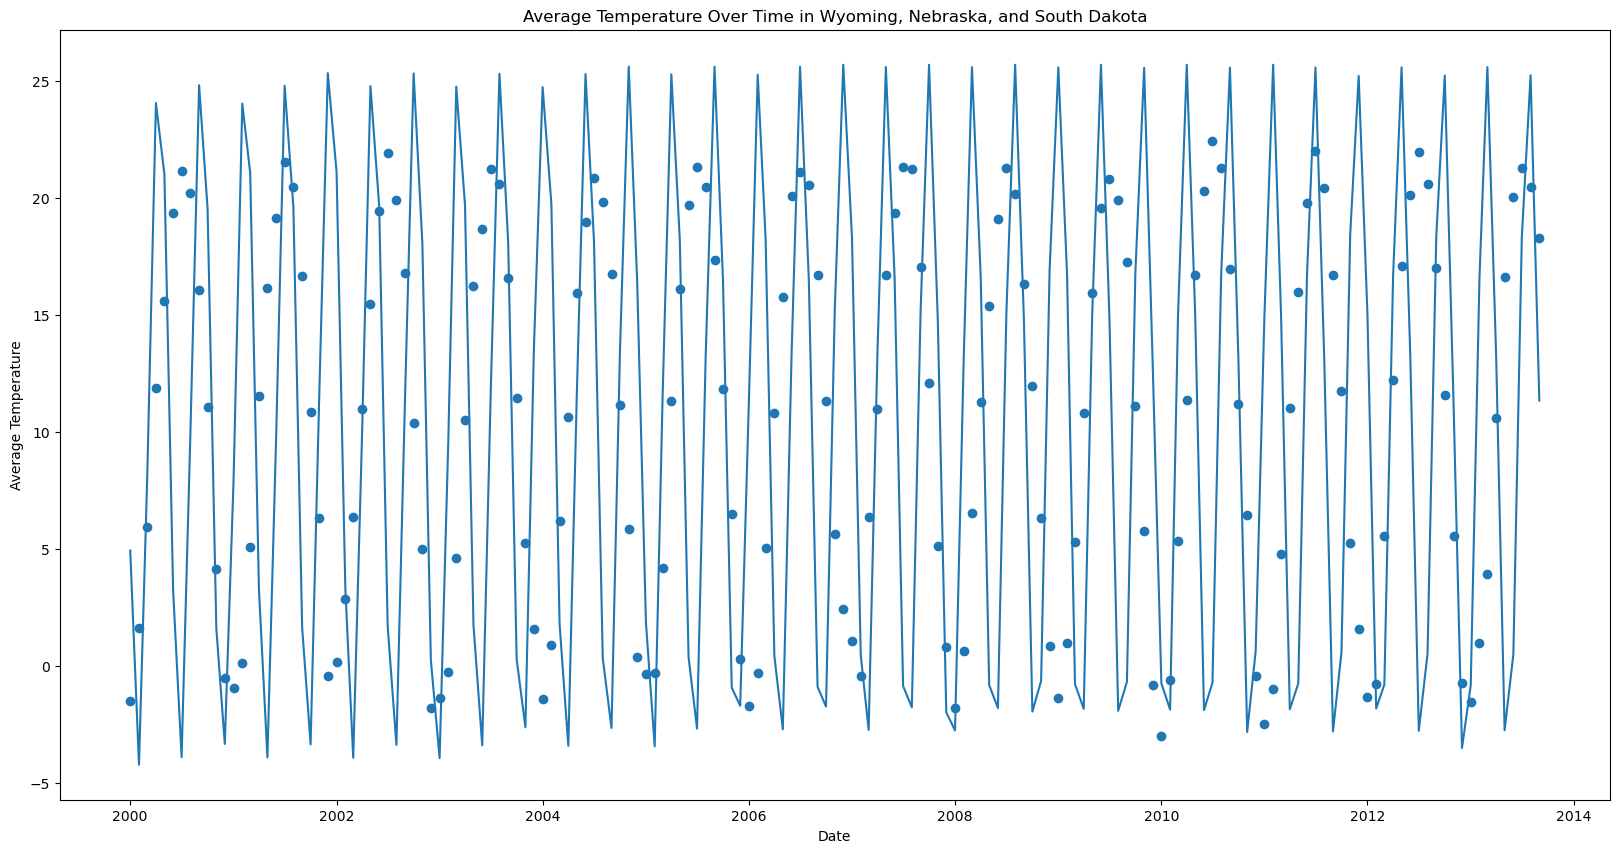

In [653]:
plt.figure(figsize = (20, 10))
plt.scatter(dataFrame['dt'], dataFrame['AverageTemperature'])
plt.plot(dataFrame['dt'], yFit)
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time in Wyoming, Nebraska, and South Dakota')
plt.show()

In [654]:
errors = np.sqrt(np.diag(params_covariance))
for i, param in enumerate(params):
    print(f'Parameter {i+1}: {param:.4f} ± {errors[i]:.4f}')

Parameter 1: 0.3176 ± 1.1715
Parameter 2: 0.0500 ± 0.0007
Parameter 3: -189.0066 ± 1.7888
Parameter 4: 10.7100 ± 0.8211


In [662]:
print(f'Fitted Equation: y = {params[0]:.4f} * cos({params[1]:.4f} * x + {params[2]:.4f}) + {params[3]:.4f}')

Fitted Equation: y = 0.3176 * cos(0.0500 * x + -189.0066) + 10.7100
